# 20220926 | K-Means Clustering on the CICIDS Dataset

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


## Preparing the Dataset

In [3]:
# df_train = pd.read_csv('../train_MachineLearningCVE.csv')
df_test = pd.read_csv('../test_MachineLearningCVE.csv')

# df = pd.concat([df_train, df_test], axis=0, copy=True)
df = df_test

def preprocessing(df):
    # Shuffle the dataset
    df = df.sample(frac=1)

    # Split features and labels
    x = df.iloc[:, df.columns != 'Label']
    y = df[['Label']].to_numpy()

    # Normalize
    x = Normalizer().fit_transform(x)

    # Scale the features between 0 ~ 1
    x = MinMaxScaler().fit_transform(x)

    return x,y

X, Y = preprocessing(df)

In [4]:
print(X.shape)
print(Y.shape)

print(len(df[['Label']].value_counts().to_list()))
df[['Label']].value_counts()

(566149, 78)
(566149, 1)
15


Label
0        454620
4         46215
10        31786
2         25606
3          2059
7          1588
11         1179
6          1159
5          1100
1           393
12          301
14          130
9             7
13            4
8             2
dtype: int64

## Applying K-Means Clustering

In [6]:
max_k = 10
distortions = []
for i in range(1, max_k):
    km = KMeans(n_clusters=i, n_init=1, max_iter=100)
    km.fit(X)
    distortions.append(km.inertia_)
    print(f"{i}: {distortions[i-1]}")

1: 854003.0099095481
2: 629525.2165171935
3: 433910.66983554343
4: 384314.9417037079
5: 300009.2008198553
6: 239298.59943066866
7: 209641.39041454764
8: 166169.05969263957
9: 162678.83972384105


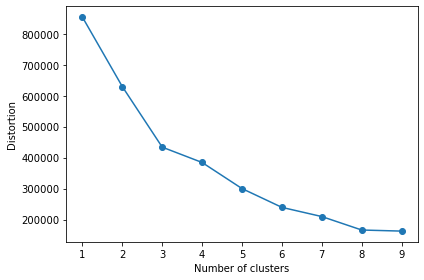

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(1, max_k), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## Interpreting the clusters
- As we can see from the graph, the ideal number of clusters is 3 as it is the elbow point.